In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv


In [2]:
D = pd.read_csv("3raprobcasaGas.TXT", header=None, sep='\t')

D.columns = ['Z','Y','X','Date']


In [3]:
from scipy.stats import mode

N = len(D)

S = pd.DataFrame(columns=['Z','X','Y','Date'])

j = 0

for i in range(1,len(D)-1):

    R = abs(D.loc[i][:3]-D.loc[i-1][:3])

    if any(R > 1000)==False:
        
        S.loc[j] = D.loc[i].values
        
        j +=1

In [101]:

S = S.loc[300:]

S['Date']

300      000504-02:56:41
301      000504-02:56:42
302      000504-02:56:43
303      000504-02:56:46
304      000504-02:56:47
              ...       
14070    000504-07:06:01
14071    000504-07:06:02
14072    000504-07:06:03
14073    000504-07:06:04
14074    000504-07:06:06
Name: Date, Length: 13775, dtype: object

In [102]:
pd.to_datetime(S['Date'], format='%Y%m%d', errors='ignore')

300      000504-02:56:41
301      000504-02:56:42
302      000504-02:56:43
303      000504-02:56:46
304      000504-02:56:47
              ...       
14070    000504-07:06:01
14071    000504-07:06:02
14072    000504-07:06:03
14073    000504-07:06:04
14074    000504-07:06:06
Name: Date, Length: 13775, dtype: object

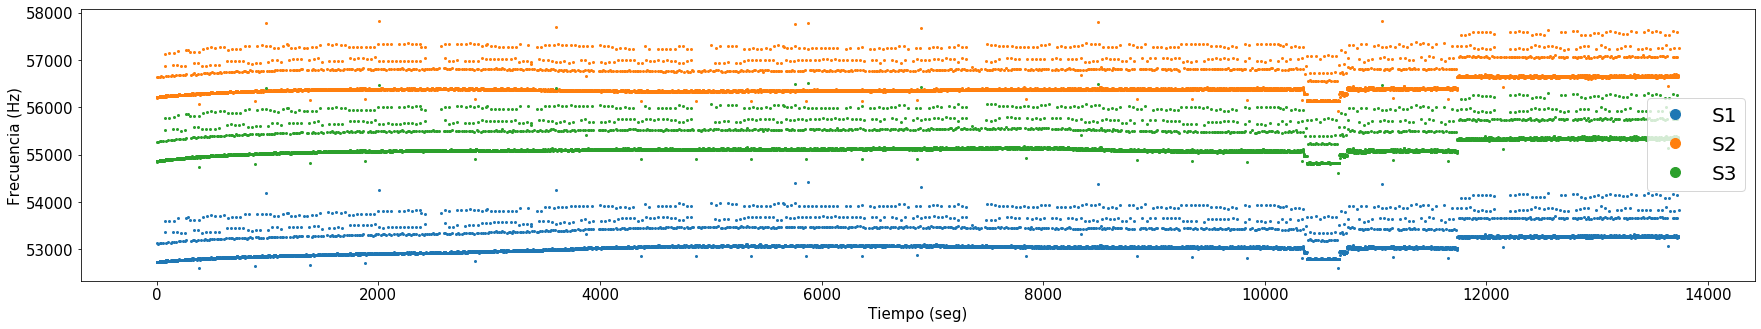

In [103]:
Fx = S.X.values
Fy = S.Y.values
Fz = S.Z.values

Fx = Fx[Fx <120000]
Fy = Fy[Fy <120000]
Fz = Fz[Fz <120000]

plt.figure(figsize=(30,5))

plt.plot(Fx,'o',ms=2,label='S1');plt.plot(Fy,'o',ms=2,label='S2');plt.plot(Fz,'o',ms=2,label='S3');

plt.ylabel('Frecuencia (Hz)',fontsize=15)
plt.xlabel('Tiempo (seg)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.xlim(11500,12000)

plt.legend(markerscale=5,fontsize=20)

plt.savefig('Datos_4_horas.png',dpi=100,box_inches='tight')


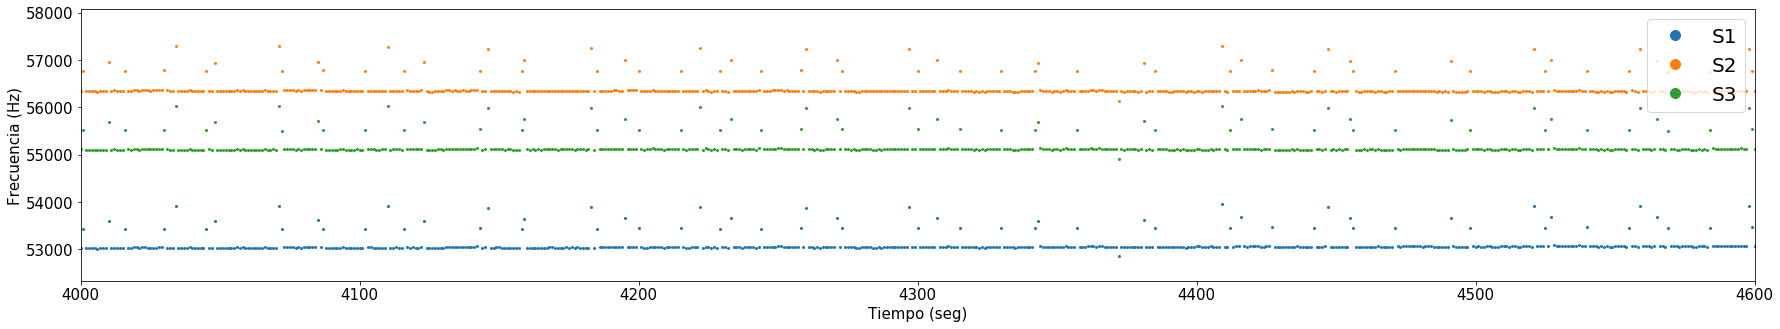

In [104]:
plt.figure(figsize=(30,5))

plt.plot(Fx,'o',ms=2,label='S1');plt.plot(Fy,'o',ms=2,label='S2');plt.plot(Fz,'o',ms=2,label='S3');

plt.ylabel('Frecuencia (Hz)',fontsize=15)
plt.xlabel('Tiempo (seg)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlim(4000,4000+60*10)

plt.legend(markerscale=5,fontsize=20)


In [105]:
import numpy as np

def B(X):
    return (X**2)*6.48063139e-05 -8.70937219e+00*X+  2.90206636e+05

def Buna(X):
    return (X**2)*5.42169825e-05 -7.61926298e+00*X+  2.67310875e+05

Bx = np.array(B(Fx),dtype=np.float64)
By = np.array(B(Fy),dtype=np.float64)
Bz = np.array(B(Fz),dtype=np.float64)

Hfiuna = np.sqrt(np.square(Bx)+np.square(By))

Bfiuna = np.sqrt(np.square(Bx)+np.square(By)+np.square(Bz))

Bx = np.array(Buna(Fx),dtype=np.float64)
By = np.array(Buna(Fy),dtype=np.float64)
Bz = np.array(Buna(Fz),dtype=np.float64)

Huna = np.sqrt(np.square(Bx)+np.square(By))

Buna = np.sqrt(np.square(Bx)+np.square(By)+np.square(Bz))


Valor medio del campo con curva UNA (4h) 22236.237194899673 +/- 614.7411939452838
Valor medio del campo con curva FIUNA-IPT (4h) 13728.045639077593 +/- 579.8941865890355


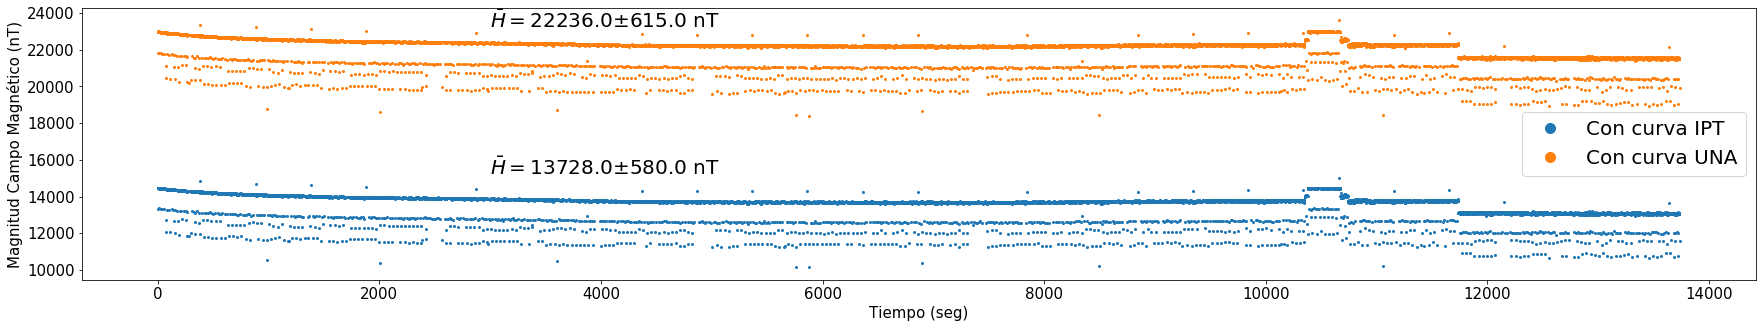

In [106]:
plt.figure(figsize=(30,5))

plt.ylabel('Magnitud Campo Magnético (nT)',fontsize=15)
plt.xlabel('Tiempo (seg)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.plot(Bx,'o')
#plt.plot(By,'o')
#plt.plot(Bz,'o')

plt.plot(Bfiuna,'o',ms=2,label='Con curva IPT')
plt.plot(Buna,'o',ms=2,label='Con curva UNA')


Bmedio = np.median(Buna)
Bstd = np.std(Buna)

print('Valor medio del campo con curva UNA (4h)',Bmedio,'+/-',Bstd)

plt.text(3000,23250,r'$\bar{H}=$'+str(np.round(Bmedio,0))+'$\pm$'+str(np.round(Bstd,0))+' nT',fontsize=20)

Bmedio = np.median(Bfiuna)
Bstd = np.std(Bfiuna)

print('Valor medio del campo con curva FIUNA-IPT (4h)',Bmedio,'+/-',Bstd)

plt.text(3000,15250,r'$\bar{H}=$'+str(np.round(Bmedio,0))+'$\pm$'+str(np.round(Bstd,0))+' nT',fontsize=20)

plt.legend(markerscale=5,fontsize=20)

plt.savefig('Datos_Campo_Magnetico.png',dpi=100,box_inches='tight')


Valor medio del campo con curva UNA (4h) 18664.148582166294 +/- 508.739165621449
Valor medio del campo con curva FIUNA-IPT (4h) 11769.956047624182 +/- 480.3404148727148


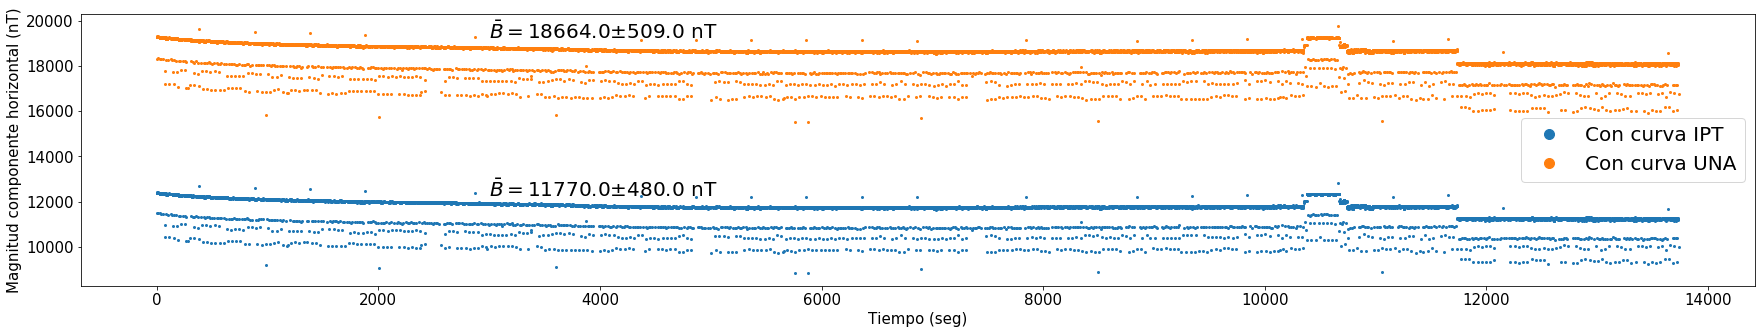

In [107]:
plt.figure(figsize=(30,5))

plt.ylabel('Magnitud componente horizontal (nT)',fontsize=15)
plt.xlabel('Tiempo (seg)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.plot(Bx,'o')
#plt.plot(By,'o')
#plt.plot(Bz,'o')

plt.plot(Hfiuna,'o',ms=2,label='Con curva IPT')
plt.plot(Huna,'o',ms=2,label='Con curva UNA')

plt.legend(markerscale=5,fontsize=20)

Hmedio = np.median(Huna)
Hstd = np.std(Huna)

print('Valor medio del campo con curva UNA (4h)',Hmedio,'+/-',Hstd)

plt.text(3000,19250,r'$\bar{B}=$'+str(np.round(Hmedio,0))+'$\pm$'+str(np.round(Hstd,0))+' nT',fontsize=20)

Hmedio = np.median(Hfiuna)
Hstd = np.std(Hfiuna)

print('Valor medio del campo con curva FIUNA-IPT (4h)',Hmedio,'+/-',Hstd)

plt.text(3000,12250,r'$\bar{B}=$'+str(np.round(Hmedio,0))+'$\pm$'+str(np.round(Hstd,0))+' nT',fontsize=20)

plt.legend(markerscale=5,fontsize=20)

plt.savefig('Datos_Campo_Horizontal.png',dpi=100,box_inches='tight')


Valor medio del campo con curva UNA (4h) 22243.235181958153 +/- 62.24445772039913
Valor medio del campo con curva FIUNA-IPT (4h) 13733.346076398615 +/- 60.53262619001587
304.12116487221283


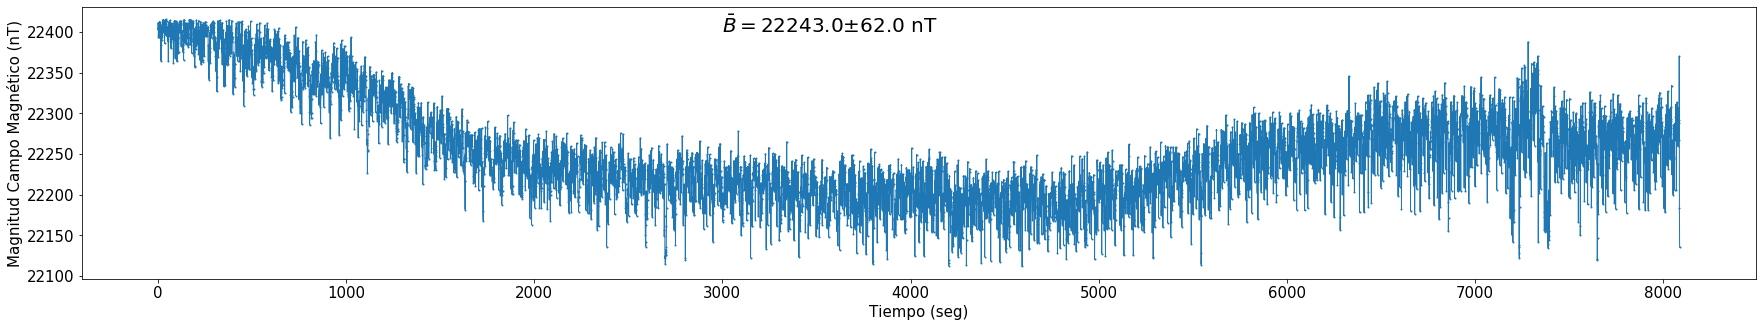

In [112]:
Bmedio = np.median(Buna)
Bstd = np.std(Buna)

BUNA = Buna[np.where(abs(Buna-Bmedio)<Bstd)]

Bmedio = np.median(Bfiuna)
Bstd = np.std(Bfiuna)

BFIUNA = Bfiuna[np.where(abs(Bfiuna-Bmedio)<Bstd)]

BFIUNAmed = np.median(BFIUNA)
BUNAmed = np.median(BUNA)
BFIUNAstd = np.std(BFIUNA)
BUNAstd = np.std(BUNA)

BFIUNA = BFIUNA[np.where(abs(BFIUNA-BFIUNAmed)<BFIUNAstd)]
BUNA = BUNA[np.where(abs(BUNA-BUNAmed)<BUNAstd)]

plt.figure(figsize=(30,5))

#plt.plot(BFIUNA,'o',ms=2,label='Con curva IPT')

plt.plot(BUNA,'-o',lw=1,ms=1)#,label='Con curva UNA')

plt.ylabel('Magnitud Campo Magnético (nT)',fontsize=15)
plt.xlabel('Tiempo (seg)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.plot(Bx,'o')
#plt.plot(By,'o')
#plt.plot(Bz,'o')

Bmedio = np.median(BUNA)
Bstd = np.std(BUNA)

print('Valor medio del campo con curva UNA (4h)',Bmedio,'+/-',Bstd)

plt.text(3000,22400,r'$\bar{B}=$'+str(np.round(Bmedio,0))+'$\pm$'+str(np.round(Bstd,0))+' nT',fontsize=20)

Bmedio = np.median(BFIUNA)
Bstd = np.std(BFIUNA)

print('Valor medio del campo con curva FIUNA-IPT (4h)',Bmedio,'+/-',Bstd)

#plt.text(3000,15250,r'$\bar{B}=$'+str(np.round(Bmedio,0))+'$\pm$'+str(np.round(Bstd,0))+' nT',fontsize=20)
#plt.ylim(22000,22500)

#plt.legend(markerscale=5,fontsize=20)

print(np.max(BUNA)-np.min(BUNA))

plt.savefig('Datos_Campo_filtrado_UNA.png',dpi=100,box_inches='tight')


In [173]:
Bm = np.zeros(int(len(BUNA)/60)+1)
Bstd = np.zeros(int(len(BUNA)/60)+1)

for i in range(len(Bm)):
    Bstd[i] =np.std(BUNA[i*60:(i+1)*60])
    Bm[i] =np.median(BUNA[i*60:(i+1)*60])


22259.071741659078
56.06001954496441
22329.23240611961
7.9896640726388775


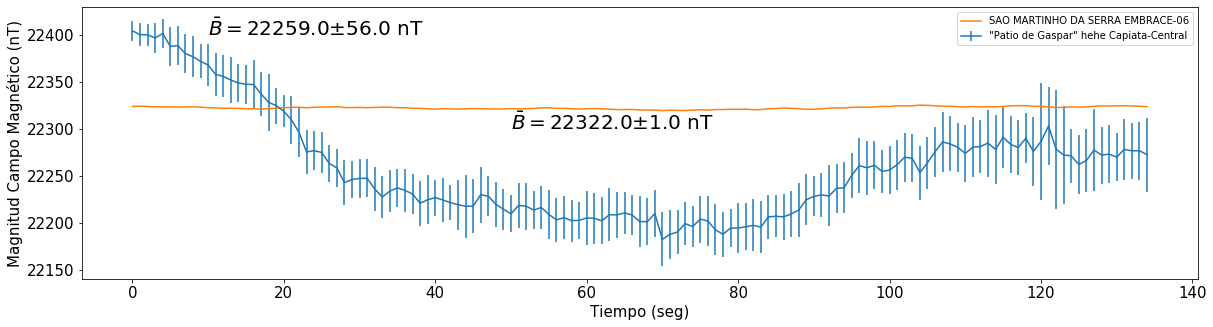

In [179]:
import scipy.io

datos= pd.read_csv('sms29oct.20m',sep=' ')

plt.figure(figsize=(20,5))

T = np.arange(0,len(Bm),1)

#plt.plot(T,Bm,label='"Patio de Gaspar" hehe Capiata-Central')

plt.errorbar(T,Bm, yerr=Bstd,label='"Patio de Gaspar" hehe Capiata-Central')

print(Bm.mean())
print(Bm.std())
print(datos['F(nT)'].mean())
print(datos['F(nT)'].std())

plt.text(10,22400,r'$\bar{B}=$'+str(np.round(np.mean(Bm),0))+'$\pm$'+str(np.round(np.std(Bm),0))+' nT',fontsize=20)

Datos = datos['F(nT)']

Datos = Datos[len(Datos)-len(Bm):]

plt.text(50,22300,r'$\bar{B}=$'+str(np.round(np.mean(Datos),0))+'$\pm$'+str(np.round(np.std(Datos),0))+' nT',fontsize=20)

plt.plot(T,Datos,label='SAO MARTINHO DA SERRA EMBRACE-06')

plt.legend()

plt.ylabel('Magnitud Campo Magnético (nT)',fontsize=15)
plt.xlabel('Tiempo (seg)',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('Comparacion_datos.png',dpi=100,box_inches='tight')